<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/Adaboost_API_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier




In [11]:
X,y = make_gaussian_quantiles(n_samples=13000,n_features=10,n_classes=3,random_state=1)

n_split = 3000

X_train,X_test = X[:n_split],X[n_split:]
y_train,y_test = y[:n_split],y[n_split:]

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators = 600,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators = 600,
    learning_rate = 1,
    algorithm='SAMME'

)


bdt_real.fit(X_train,y_train)
bdt_discrete.fit(X_train,y_train)






AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [23]:
real_test_errors = []
discrete_test_errors = []

for real_test_predict,discrete_train_predict in zip(bdt_real.staged_predict(X_test),bdt_discrete.staged_predict(X_test)):
  real_test_errors.append(1. - accuracy_score(real_test_predict,y_test))
  discrete_test_errors.append(1. - accuracy_score(discrete_train_predict,y_test))


n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

print(n_trees_discrete,n_trees_real)




600 600


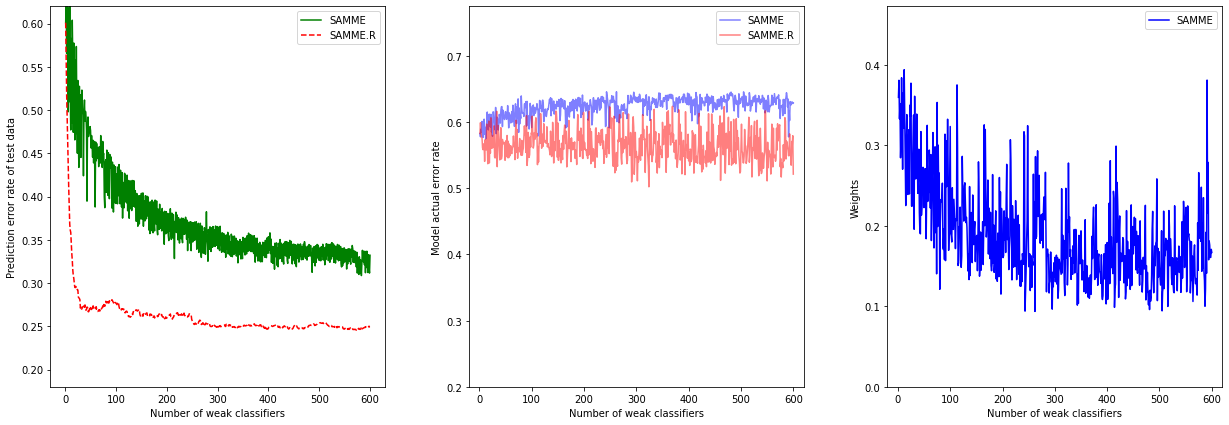

In [24]:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]


plt.figure(figsize=(21, 7), facecolor='w')

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='g', label='SAMME')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='r',
         linestyle='dashed', label='SAMME.R')
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel(u'Prediction error rate of test data')
plt.xlabel(u'Number of weak classifiers')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5)
plt.legend()
plt.ylabel(u'Model actual error rate')
plt.xlabel(u'Number of weak classifiers')
plt.ylim((.2,
          max(real_estimator_errors.max(),
              discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "b", label='SAMME')
plt.legend()
plt.ylabel(u'Weights')
plt.xlabel(u'Number of weak classifiers')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# 显示
plt.subplots_adjust(wspace=0.25)
plt.show()